In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
sns.set()

C:\Users\Raad\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data= pd.read_csv("listings.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,90676,Home in Columbus · ★4.82 · 3 bedrooms · 3 beds...,483306,Audra & Lacey,NaN,Near North/University,39.98366,-83.00252,Entire home/apt,132.0,1,726,2023-12-17,4.88,3,0,101,2022-2475
1,543140,Home in Columbus · ★4.70 · 1 bedroom · 1 bed ·...,2350409,Edward,NaN,Near North/University,40.01114,-83.01005,Private room,29.0,7,133,2023-12-09,0.96,3,327,10,2019-1344
2,591101,Loft in Columbus · ★4.92 · 1 bedroom · 1 bed ·...,2889677,Gail,NaN,Near East,39.96041,-82.98005,Private room,110.0,2,296,2023-11-12,2.14,1,0,19,2019-1230
3,923248,Hostel in Columbus · ★4.74 · 1 bedroom · 5 bed...,4965048,Mathew,NaN,Near North/University,40.01259,-83.00164,Shared room,30.0,1,348,2023-11-23,2.64,8,349,54,2019-1314
4,927867,Hostel in Columbus · ★4.72 · 1 bedroom · 1 bed...,4965048,Mathew,NaN,Near North/University,40.01259,-83.00164,Private room,73.0,1,76,2023-10-28,0.61,8,336,9,2019-1314


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2668 non-null   int64  
 1   name                            2668 non-null   object 
 2   host_id                         2668 non-null   int64  
 3   host_name                       2668 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   2668 non-null   object 
 6   latitude                        2668 non-null   float64
 7   longitude                       2668 non-null   float64
 8   room_type                       2668 non-null   object 
 9   price                           2579 non-null   float64
 10  minimum_nights                  2668 non-null   int64  
 11  number_of_reviews               2668 non-null   int64  
 12  last_review                     22

In [4]:
#removing duplicates
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [5]:
data.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               2668
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                               89
minimum_nights                       0
number_of_reviews                    0
last_review                        381
reviews_per_month                  381
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                            368
dtype: int64

In [6]:
#dropping unnecessary columns
data.drop(['id', 'name', 'host_name','last_review', 'neighbourhood_group'], axis=1, inplace=True)

In [7]:
#filling empty reviews with 0 value
data['reviews_per_month'].fillna(0, inplace=True)

In [8]:
#filling missing (price) values with mean price.
mean_price = data['price'].mean()
data['price'].fillna(mean_price, inplace=True)

In [9]:
data.isnull().sum()

host_id                             0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                   0
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                           368
dtype: int64

In [10]:
data.head()

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,483306,Near North/University,39.98366,-83.00252,Entire home/apt,132.0,1,726,4.88,3,0,101,2022-2475
1,2350409,Near North/University,40.01114,-83.01005,Private room,29.0,7,133,0.96,3,327,10,2019-1344
2,2889677,Near East,39.96041,-82.98005,Private room,110.0,2,296,2.14,1,0,19,2019-1230
3,4965048,Near North/University,40.01259,-83.00164,Shared room,30.0,1,348,2.64,8,349,54,2019-1314
4,4965048,Near North/University,40.01259,-83.00164,Private room,73.0,1,76,0.61,8,336,9,2019-1314


In [11]:
data.iloc[:,3:].describe()

,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2668.000000,2668.000000,2668.00000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000
mean,-82.989815,142.770066,7.45952,50.091454,1.987792,13.258621,194.419790,17.464768
std,0.040977,122.352286,13.12943,85.014416,1.982144,18.523403,137.967943,22.443761
min,-83.173610,9.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,-83.007393,77.000000,1.00000,3.000000,0.380000,2.000000,61.000000,1.000000
50%,-82.997043,114.000000,2.00000,16.000000,1.480000,5.000000,180.000000,9.000000
75%,-82.973175,160.000000,3.00000,57.000000,2.980000,19.000000,340.250000,26.000000
max,-82.782440,1673.000000,300.00000,833.000000,15.400000,89.000000,365.000000,298.000000


In [12]:
#checking what hosts (IDs) have the most listings on Airbnb platform.
top_host=data.host_id.value_counts().head()
top_host

host_id
158439641    89
453019578    51
235497311    44
194281106    40
263502162    33
Name: count, dtype: int64

In [13]:
data.neighbourhood.unique()

array(['Near North/University', 'Near East', 'Near South', 'Clintonville',
       'West Olentangy', 'South Linden', 'Rocky Fork-Blacklick',
       'Eastmoor/Walnut Ridge', 'Hayden Run', 'Northland', 'Downtown',
       'Northwest', 'Far Northwest', 'North Linden', 'Far East',
       'West Scioto', 'Far West', 'Far South', 'Far North', 'Northeast',
       'Hilltop', 'Eastland/Brice', 'Greenlawn/Frank Road', 'Franklinton',
       'Westland', 'Southeast'], dtype=object)

In [14]:
data.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

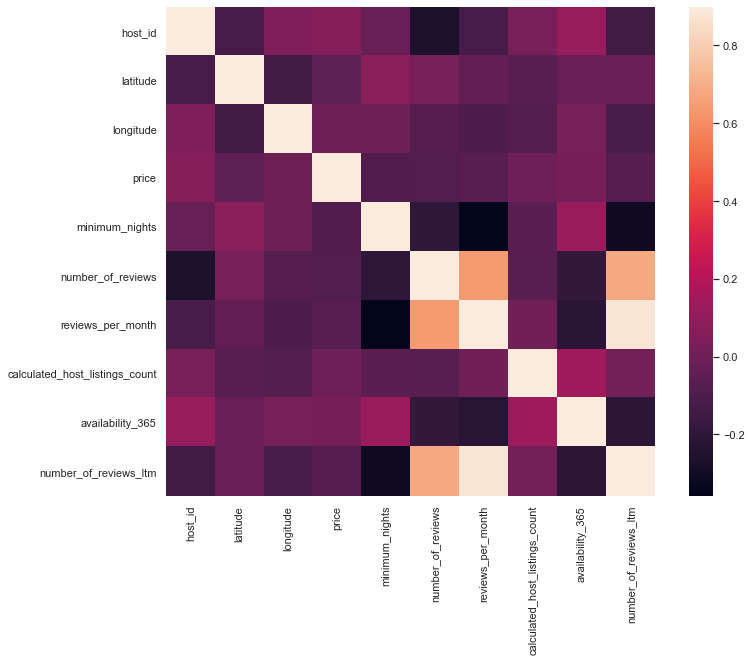

In [15]:
#checking correlation between varibales by visualizing the heatmap.
data['price'] = pd.to_numeric(data['price'], errors='coerce')

numeric_data = data.select_dtypes(include=['number'])

corrmat = numeric_data.corr()

plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

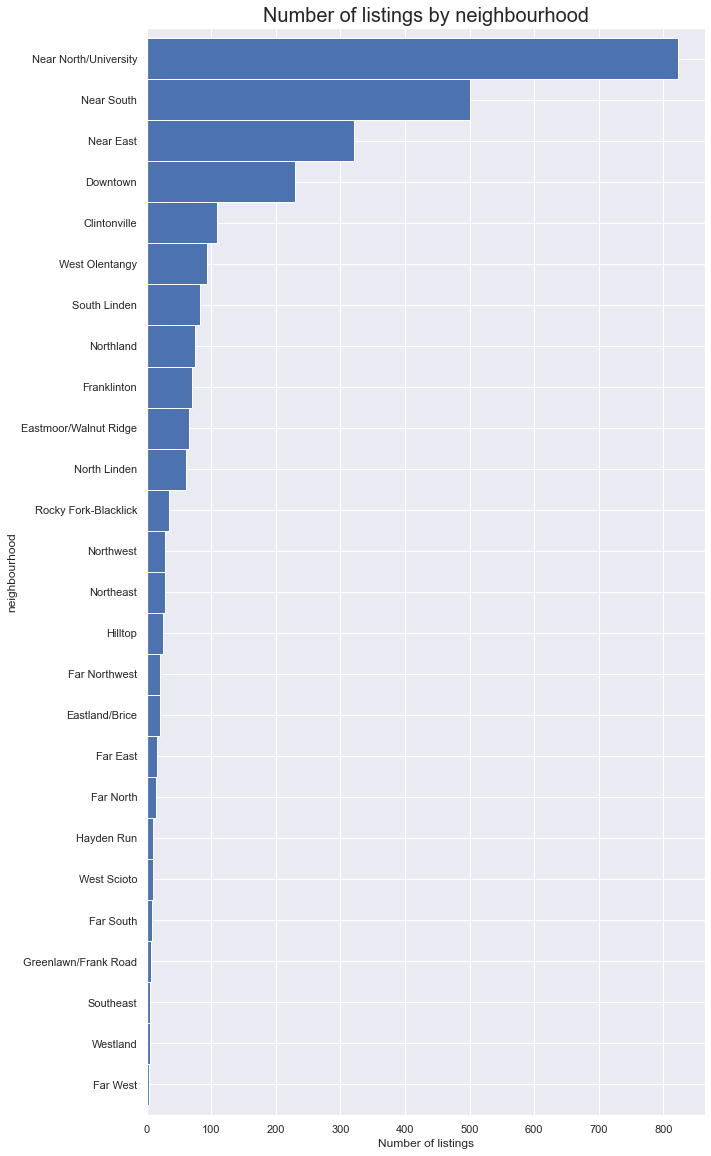

In [16]:
#Plotting counts for all Neighbourhoods.
feq=data['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 20), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

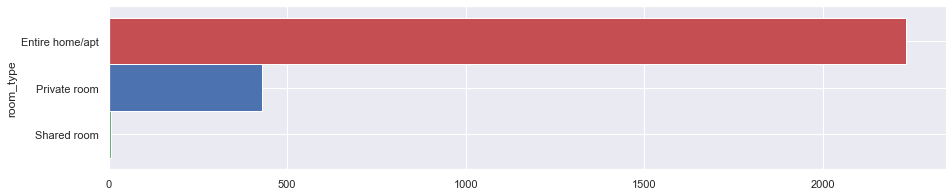

In [17]:
##Plotting counts for different room types.
freq = data['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["g","b","r"])
plt.show()

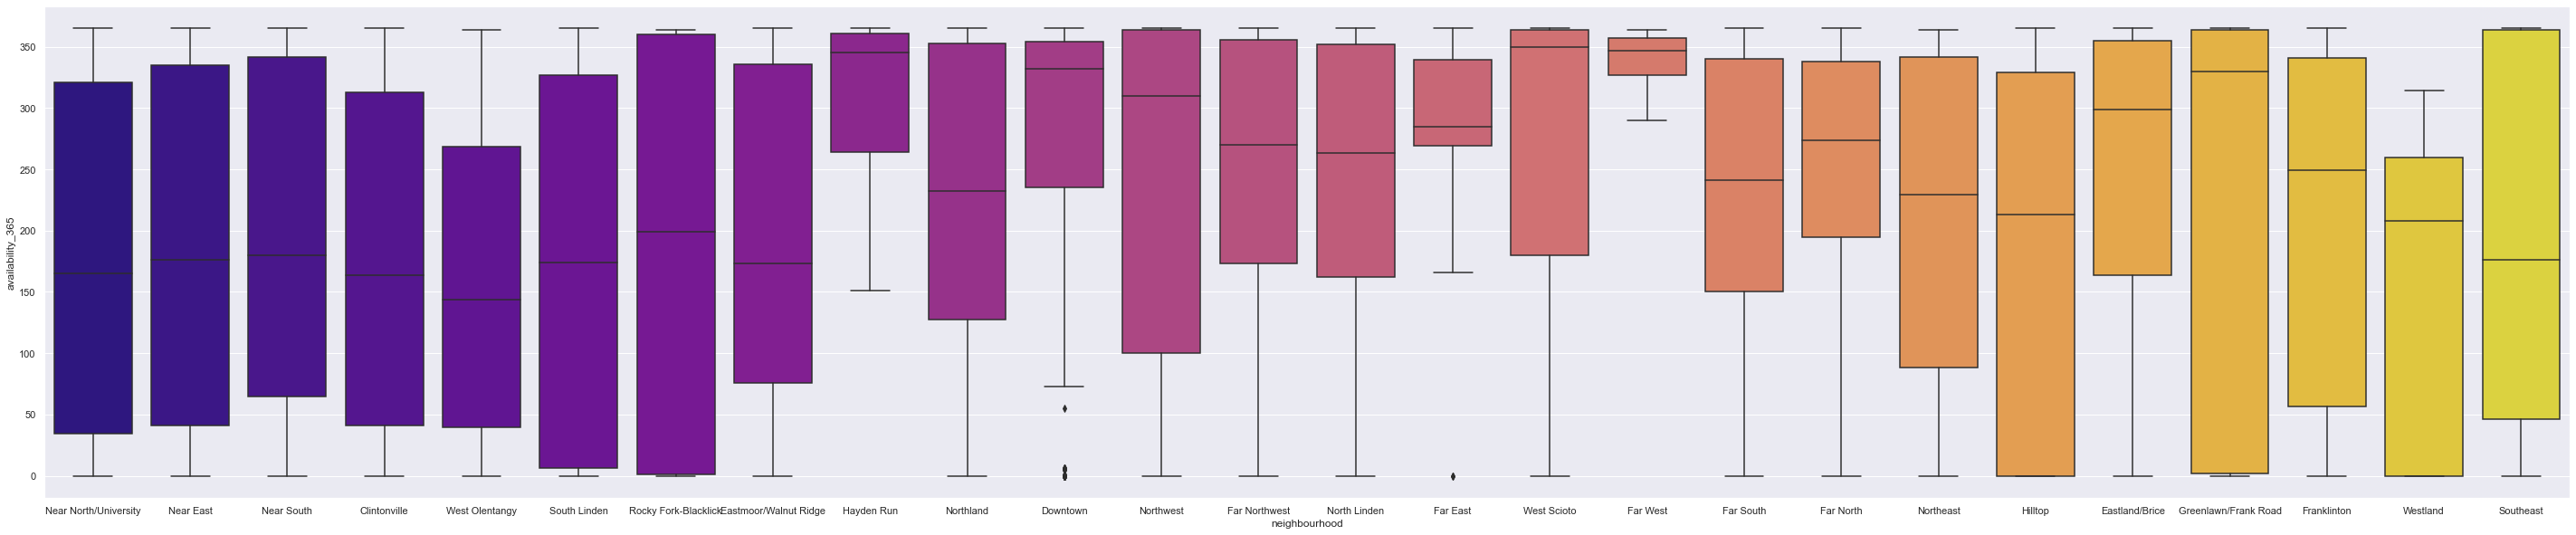

In [18]:
#Relation between Neighbourhoods and rooms availability
plt.figure(figsize=(50,10))
ax = sns.boxplot(data=data, x='neighbourhood',y='availability_365',palette='plasma')

C:\Users\Raad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


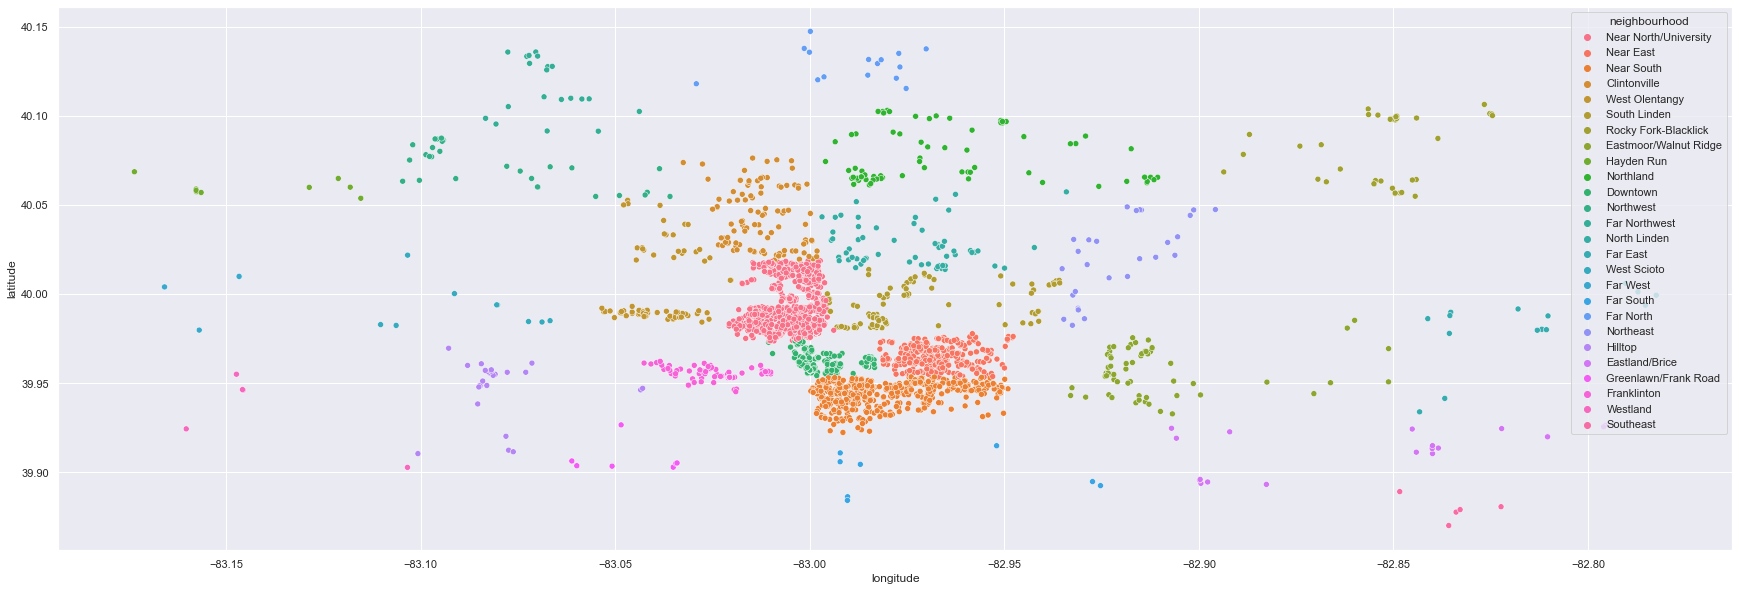

In [19]:
#Map of Neighbourhoods.
plt.figure(figsize=(30,10))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood)
plt.ioff()

C:\Users\Raad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


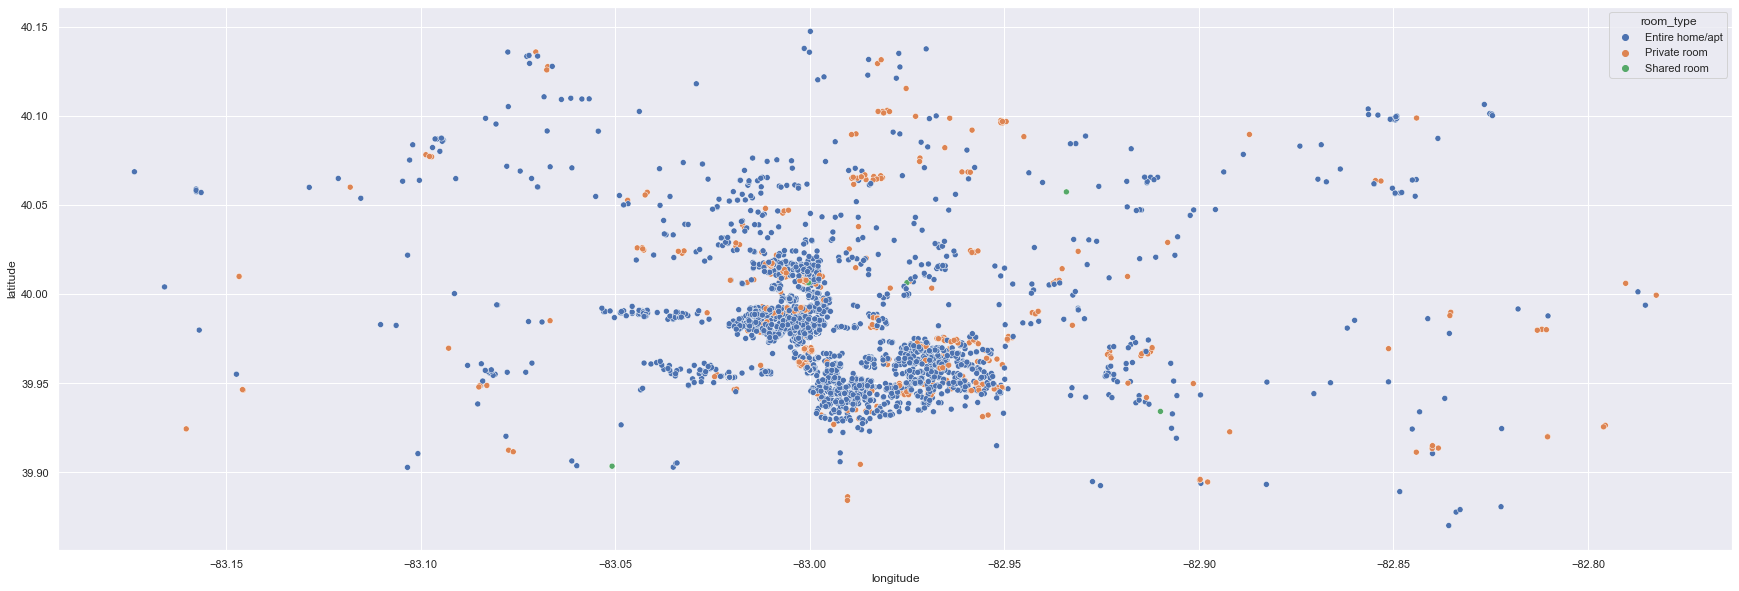

In [20]:
#Map of different type of rooms.
plt.figure(figsize=(30,10))
sns.scatterplot(data.longitude,data.latitude,hue=data.room_type)
plt.ioff()

C:\Users\Raad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


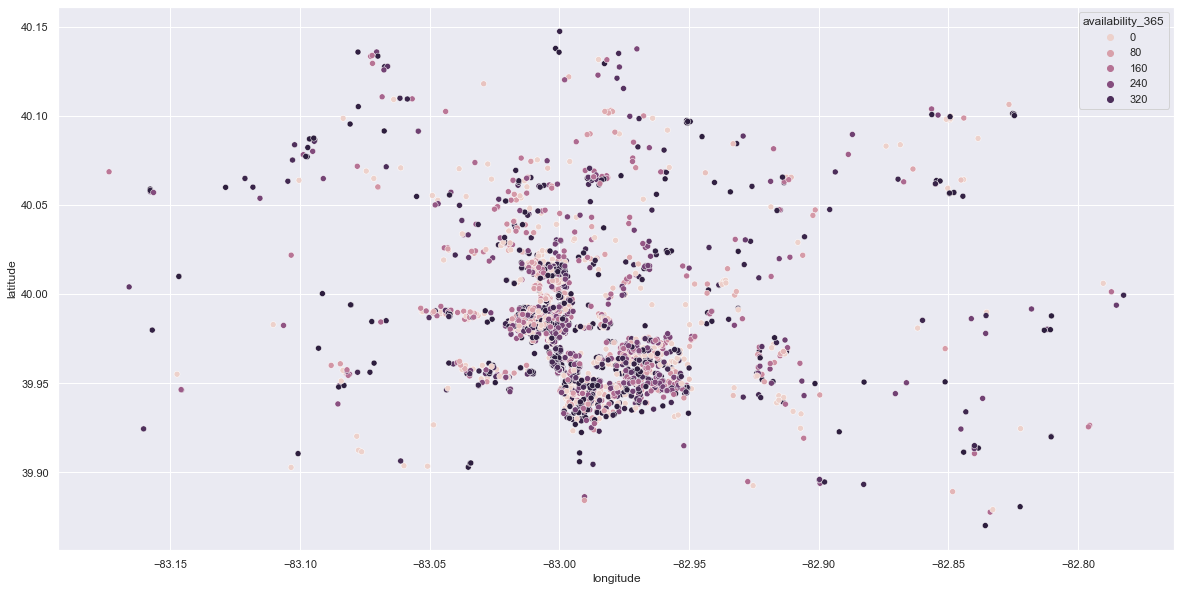

In [21]:
#Rooms availability.
plt.figure(figsize=(20,10))
sns.scatterplot(data.longitude,data.latitude,hue=data.availability_365)
plt.ioff()